<a href="https://colab.research.google.com/github/keshav123333/Machine_learning_100_campusx/blob/main/Outlier_removal/Outlier_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outlier

## How to calculate it

  1. outlier u+3standard dev  u-3standard dev indono range ke bahar wale ko outlier consider karte hum
  2. descion tree all pe jayda farak ni padta main farak linear lgistic wale algo pe padta hai

#Methods

##Method 1: z score trim
ye only normal dist pe laga sakte skew wale pe ni laga sakte important

bascially isme bhi do method
1. trimming-> if u+3standard dev u-3standard dev iss range ke bahar koi col toh row hi hata de vo
2. capping-> if iss range mein more value so jo inse bahar unhe u+3standard dev u-3standard dev inke equal kar de matalb in dono  mein se jo pas pade us outleier ke usse u+3standard dev u-3standard dev inke equal bana de

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df1=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day42-outlier-removal-using-zscore/placement.csv")

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


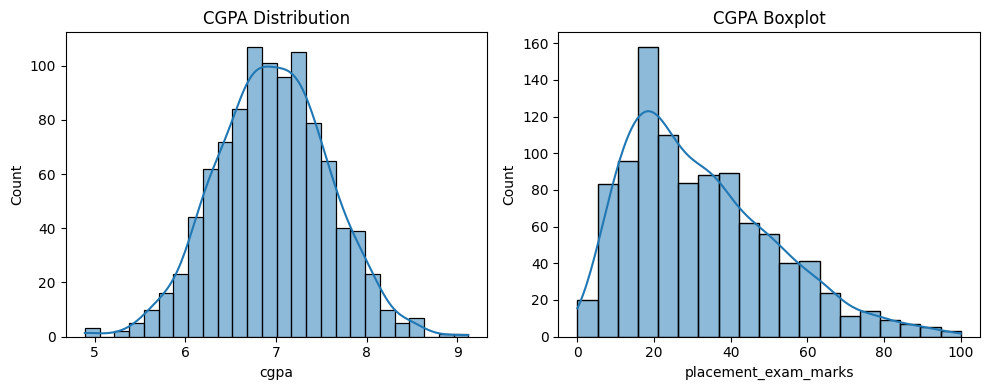

In [5]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df1['cgpa'], kde=True)
plt.title("CGPA Distribution")

plt.subplot(1,2,2)
sns.histplot(x=df1['placement_exam_marks'],kde=True)
plt.title("CGPA Boxplot")

plt.tight_layout()
plt.show()

so hum cgpa p hi laga sakte ye as vo hi normal dist

In [6]:
print(df1['cgpa'].mean()+3*df1['cgpa'].std())
print(df1['cgpa'].mean()-3*df1['cgpa'].std())#range allowed

8.808933625397168
5.113546374602832


In [7]:
df1[(df1["cgpa"]>8.80) | (df1["cgpa"]<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


Trimming

In [8]:
newdf=df1[(df1["cgpa"]<8.80) & (df1["cgpa"]>5.11)]

In [9]:
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


capping

In [10]:
upper_limit=df1['cgpa'].mean()+3*df1['cgpa'].std()
lower_limit=df1['cgpa'].mean()-3*df1['cgpa'].std()

In [11]:
df1["cgpa"]=np.where(df1["cgpa"]>upper_limit,upper_limit,
                     np.where(df1["cgpa"]<lower_limit,lower_limit,df1["cgpa"]))

## Method 2 -> IQR Method

When to use ->> jab data skewed ho

q1 -> 25 percentile value
q3-> 75 percentile values

iqr -> space b/w q1 and q3

minumum=q1-1.5iqr
max=q3+1.5*iqr

In [14]:
df1=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day42-outlier-removal-using-zscore/placement.csv")

In [15]:
#now placement wal skewed tha uspe lagayeng
per25=df1["placement_exam_marks"].quantile(0.25)
per75=df1["placement_exam_marks"].quantile(0.75)

In [16]:
upper_limit=per75+1.5*(per75-per25)
lower_limit=per25-1.5*(per75-per25)

trimming

In [17]:
newdf=df1[(df1["placement_exam_marks"]<lower_limit)|(df1["placement_exam_marks"]>upper_limit)]

In [18]:
newdf

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


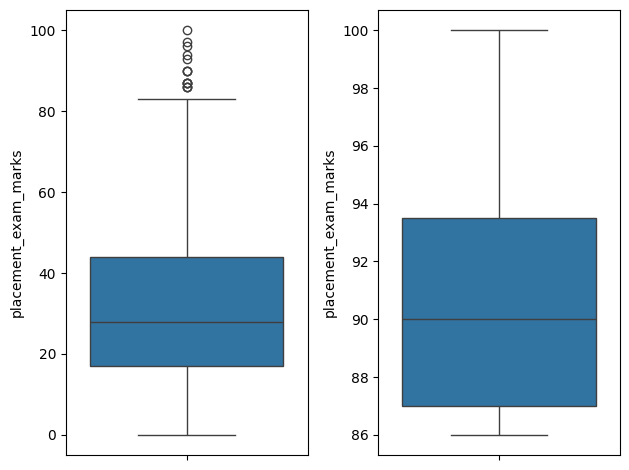

In [20]:
plt.subplot(1,2,1)
sns.boxplot(df1["placement_exam_marks"])
plt.subplot(1,2,2)
sns.boxplot(newdf["placement_exam_marks"])
#outlier hat gaye
plt.tight_layout()

capping

In [23]:
newdf_cap=df1.copy()
newdf_cap["placement_exam_marks"]=np.where(newdf_cap["placement_exam_marks"]>upper_limit,upper_limit,
                                           np.where(newdf_cap["placement_exam_marks"]<lower_limit,lower_limit,newdf_cap["placement_exam_marks"])
)

#yaha pe np.where ek array retrun an newcapdf uss array ko ab naya df ke col mein bana lega

#Method 3-> Percntile

same cheez percetile main 1percentile lower limit and 99 percentile higher

means kya hai 99percentile matlab 99 percent log apse peche hai means chahe marks 1 hi kyon na aaye ho if 1 marks se upar kisi ke ni toh 1 marks wale ke 100 percentile

In [25]:
df1=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day42-outlier-removal-using-zscore/placement.csv")

In [26]:
#now placement wal skewed tha uspe lagayeng
upper_limit=df1["placement_exam_marks"].quantile(0.99)
lower_limit=df1["placement_exam_marks"].quantile(0.01)
#bas ab trimming ya capping laga lo df pe iss limit ko use karke